# Cálculo de caudal ecológico con python

## Imporación de librería para manejo de datos y lectua de datos de un excel
### Se us la fecha como índice de los datos

In [5]:
%matplotlib notebook
import pandas as pd
datos_caudales = pd.read_excel('datos.xlsx', index_col=0, parse_dates=True)

## Verificación de lectura de datos

In [6]:
datos_caudales.head()

,Q ( m3/s)
Fecha,
2023-09-12,46.2036
2023-09-13,46.1825
2023-09-14,46.2085
2023-09-15,46.7825
2023-09-16,45.8507


In [7]:
datos_caudales.tail()

,Q ( m3/s)
Fecha,
2023-11-26,46.1025
2023-11-27,46.2102
2023-11-28,46.5784
2023-11-29,46.2152
2023-11-30,46.3406


## Representación de datos a través del tiempo

<IPython.core.display.Javascript object>


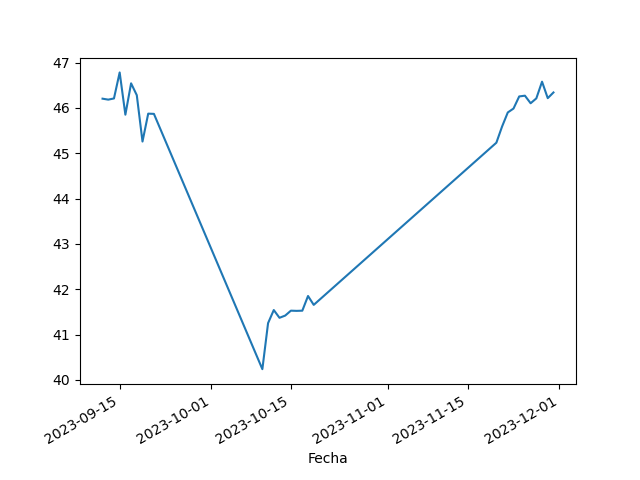

In [9]:
datos_caudales['Q   ( m3/s)'].plot()
figsize=(16,3)

## Extracción de la columna con caudales "Q(m3/s)"

In [12]:
solo_caudal = datos_caudales[['Q   ( m3/s)']]
solo_caudal.head()

,Q ( m3/s)
Fecha,
2023-09-12,46.2036
2023-09-13,46.1825
2023-09-14,46.2085
2023-09-15,46.7825
2023-09-16,45.8507


## Representación de los datos extraidos con un gráfico de puntos

<IPython.core.display.Javascript object>


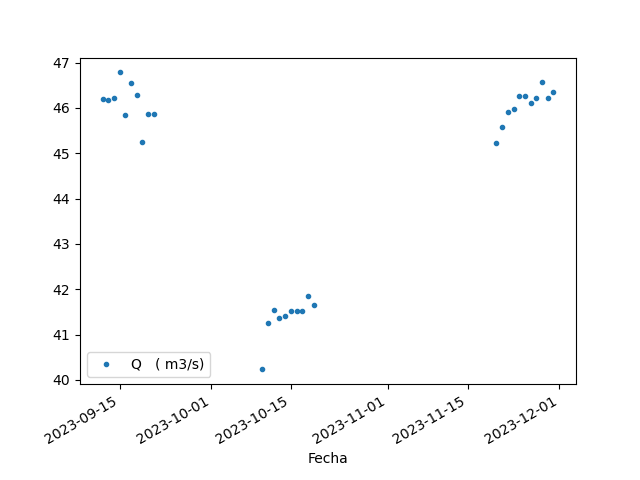

In [14]:
solo_caudal.plot(style=".")
figsize=(16,3)

## Creación y agrupación de los datos por meses
### 9=septiembre, 10=octubre, 11=noviembre

In [15]:
caudales_mensuales = solo_caudal.groupby(lambda m: m.month)
caudales_mensuales.head()

,Q ( m3/s)
Fecha,
2023-09-12,46.2036
2023-09-13,46.1825
2023-09-14,46.2085
2023-09-15,46.7825
2023-09-16,45.8507
2023-10-10,40.2365
2023-10-11,41.2521
2023-10-12,41.5407
2023-10-13,41.3696


## Cálculos con los caudales
### Cálculo del máximo

In [19]:
caudales_mensuales.max()

,Q ( m3/s)
Fecha,
9,46.7825
10,41.8505
11,46.5784


### Cálculo del promedio

In [20]:
caudales_mensuales.mean()

,Q ( m3/s)
Fecha,
9,46.105050
10,41.389850
11,46.061573


### Cálculo de la mediana

In [21]:
caudales_mensuales.median()

,Q ( m3/s)
Fecha,
9,46.19305
10,41.52450
11,46.21020


### Cálculo del mínimo

In [22]:
caudales_mensuales.min()

,Q ( m3/s)
Fecha,
9,45.2584
10,40.2365
11,45.2325


## Gráfico de los cálculos, respecto a los meses

<IPython.core.display.Javascript object>


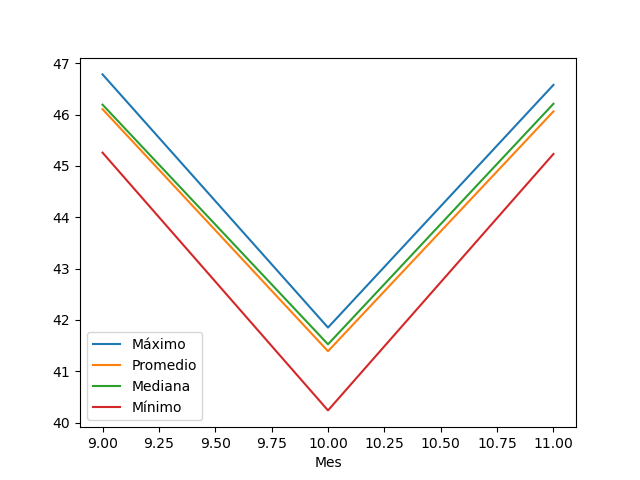

In [23]:
import matplotlib.pyplot as plt
plt.plot(caudales_mensuales.max(),label='Máximo')
plt.plot(caudales_mensuales.mean(),label='Promedio')
plt.plot(caudales_mensuales.median(),label='Mediana')
plt.plot(caudales_mensuales.min(),label='Mínimo' )
plt.xlabel('Mes')
plt.legend()
plt.show()

### Aplicación de logaritmos para suavizar la curva
### No se aprecia la diferencia por los pocos datos

<IPython.core.display.Javascript object>


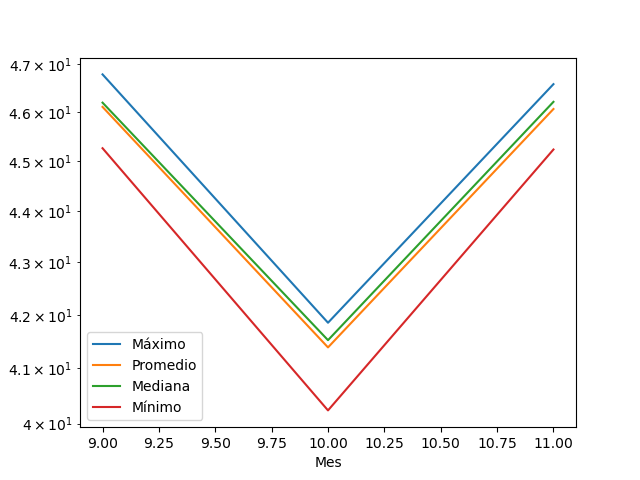

In [37]:
import matplotlib.pyplot as plt
plt.plot(caudales_mensuales.max(),label='Máximo')
plt.plot(caudales_mensuales.mean(),label='Promedio')
plt.plot(caudales_mensuales.median(),label='Mediana')
plt.plot(caudales_mensuales.min(),label='Mínimo' )
plt.xlabel('Mes')
plt.legend()
plt.semilogy()
plt.show()

## Gráfico de cajas de los caudales por mes

<IPython.core.display.Javascript object>


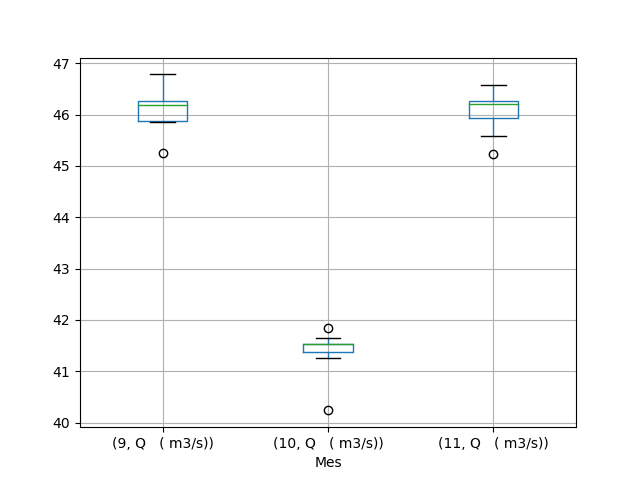

Text(0.5, 0, 'Mes')

In [31]:
caudales_mensuales.boxplot(subplots=False, return_type="dict")
plt.xlabel('Mes')

## Cálculo del caudal al 5%

In [21]:
caudales_mensuales.quantile(.05)

,Q ( m3/s)
Fecha,
9,45.524935
10,40.693520
11,45.411050


<IPython.core.display.Javascript object>


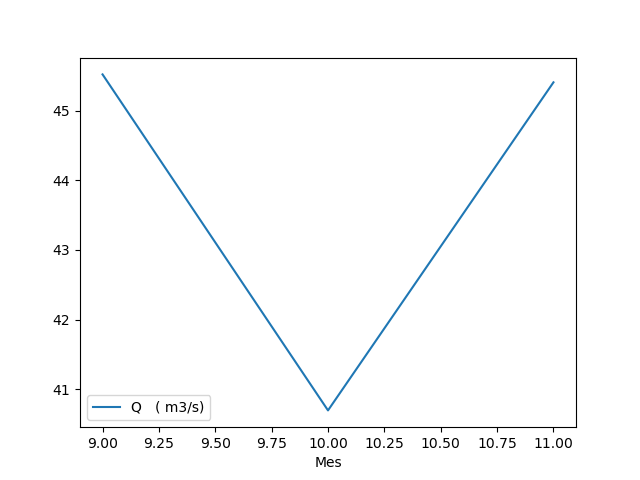

Text(0.5, 0, 'Mes')

In [33]:
caudales_mensuales.quantile(.05).plot()
plt.xlabel('Mes')

## Cálculo del caudal al 10%

In [23]:
caudales_mensuales.quantile(0.1)

,Q ( m3/s)
Fecha,
9,45.79147
10,41.15054
11,45.58960


<IPython.core.display.Javascript object>


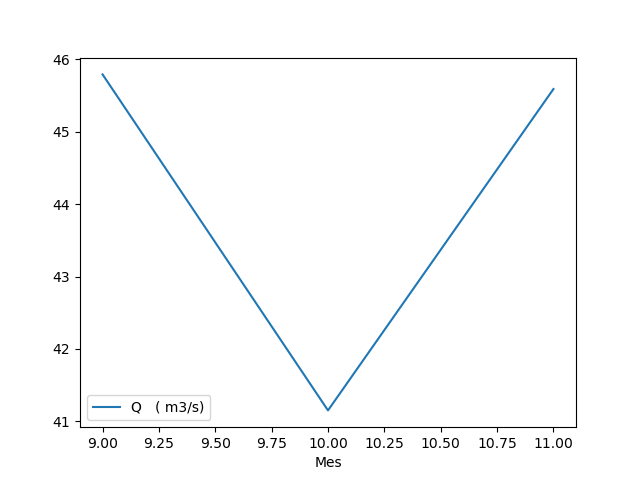

Text(0.5, 0, 'Mes')

In [34]:
caudales_mensuales.quantile(0.1).plot()
plt.xlabel('Mes')

## Cálculo del caudal al 30%

In [25]:
caudales_mensuales.quantile(0.3)

,Q ( m3/s)
Fecha,
9,45.87176
10,41.40383
11,45.98580


<IPython.core.display.Javascript object>


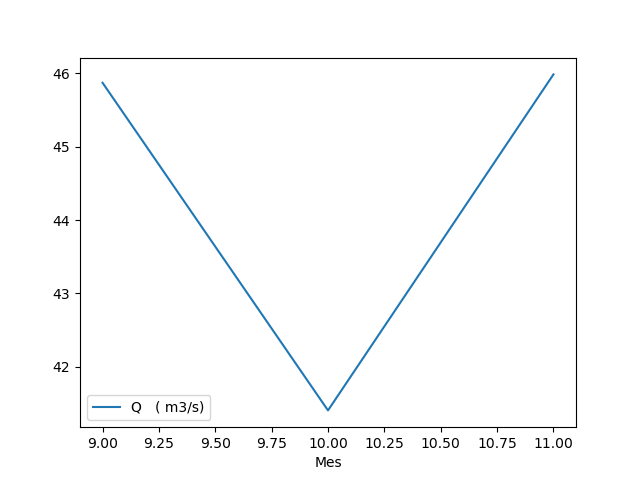

Text(0.5, 0, 'Mes')

In [35]:
caudales_mensuales.quantile(0.3).plot()
plt.xlabel('Mes')

## Cálculo del caudal al 60%

In [27]:
caudales_mensuales.quantile(0.6)


,Q ( m3/s)
Fecha,
9,46.20556
10,41.52666
11,46.21520


<IPython.core.display.Javascript object>


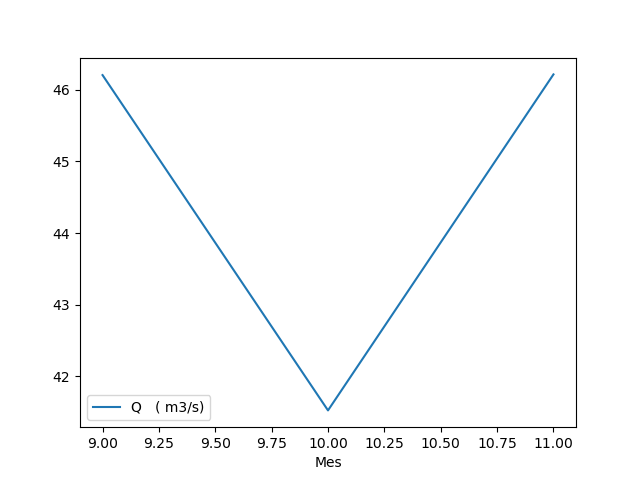

Text(0.5, 0, 'Mes')

In [36]:
caudales_mensuales.quantile(0.6).plot()
plt.xlabel('Mes')